In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
import string
#https://stackoverflow.com/questions/19726663/how-to-save-the-pandas-dataframe-series-data-as-a-figure
import six



In [2]:
datapath = "/Users/aavattikutis/Documents/epidemicmodel/cccruns/fits/fit2/tables/"
models = ["fulllinearmodel_fit_table.csv","reducedlinearmodelNegBinom_fit_table.csv",
          "reducedlinearmodelq0_fit_table.csv","reducedlinearmodelq0ctime_fit_table.csv",
         "nonlinearmodelq0ctime_fit_table.csv","nonlinearmodel_fit_table.csv"]
model_hash = {}
k = -1
for model in models:
    k += 1
    model_hash[model] = string.ascii_uppercase[k]

df = pd.DataFrame.from_dict(model_hash, orient='index')
df.to_csv('../postfit_derivatives/model_hash.csv', header=False)

In [3]:
rois = []
for model in models:
    df = pd.read_csv(datapath + model) #get rois in all tables (some may have failed)
    rois += list(df.roi.unique())

    
rois = list(set(rois))

#get inferred
theta = df.columns[2:] 
ntheta = len(theta)



In [4]:
dfwaic_sorted = pd.read_csv("../postfit_derivatives/roimodel_waicsorted_topmodel_modelname.csv")

In [5]:
theta_ = ["R0","Rlast"]
label_ = {}
label_["R0"] = "R0"
label_["Rlast"] = "R current"

dfreport = pd.DataFrame(columns=['Region', 'Model','median '+label_[theta_[0]],'CI lower','CI upper','median '+label_[theta_[1]],'CI lower','CI upper','Mean WAIC'])
k = -1
for roi in rois:
#     try:
    k += 1
    model = "fulllinearmodel_fit_table.csv" #dfwaic_sorted.loc[dfwaic_sorted.roi==roi,'model'].values[0]
    df = pd.read_csv(datapath + model)
    theta = theta_[0]
    measure1 = df.loc[(df.roi==roi)&(df['quantile']==0.5),theta].values[0]
    measure2 = df.loc[(df.roi==roi)&(df['quantile']==0.025),theta].values[0]
    measure3 = df.loc[(df.roi==roi)&(df['quantile']==0.975),theta].values[0]
    waic = dfwaic_sorted.loc[dfwaic_sorted.roi==roi,'waic'].values[0]
    x = [roi,model.split('_fit_table.csv')[0],np.round(measure1,4),np.round(measure2,4),np.round(measure3,4)]
    theta = theta_[1]
    measure1 = df.loc[(df.roi==roi)&(df['quantile']==0.5),theta].values[0]
    measure2 = df.loc[(df.roi==roi)&(df['quantile']==0.025),theta].values[0]
    measure3 = df.loc[(df.roi==roi)&(df['quantile']==0.975),theta].values[0]
    waic = dfwaic_sorted.loc[dfwaic_sorted.roi==roi,'waic'].values[0]
    x += [np.round(measure1,4),np.round(measure2,4),np.round(measure3,4),np.round(waic,2)]
    dfreport.loc[k] = x
#     except:
#         print(model)
#         print(df.columns)


print(dfreport)



                     Region            Model  median R0  CI lower  CI upper  \
0                   Ireland  fulllinearmodel     5.8438    1.7975   22.5720   
1               Philippines  fulllinearmodel     8.1191    2.3694   32.9272   
2                    Kosovo  fulllinearmodel     2.8393    1.1794   12.4587   
3                     US_VA  fulllinearmodel     4.4436    1.7559   10.8041   
4                     US_DE  fulllinearmodel     3.9107    1.6520    9.4114   
..                      ...              ...        ...       ...       ...   
165                   China  fulllinearmodel     9.7208    4.2281   19.3681   
166             El Salvador  fulllinearmodel     5.4095    1.5745   18.2774   
167  Bosnia and Herzegovina  fulllinearmodel     3.7890    1.7375   10.4374   
168                  Latvia  fulllinearmodel     5.4831    1.6639   18.8662   
169                  Mexico  fulllinearmodel     3.0962    1.4260   10.3685   

     median R current  CI lower  CI upper  Mean WAI

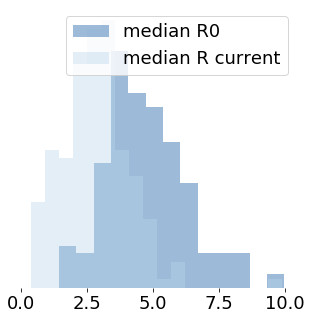

In [6]:
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)


def simpleaxis(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)

#flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
c_ = sns.color_palette('Blues')
f,ax = plt.subplots(1,1,figsize=(5,5))
sns.distplot(dfreport['median R0'],color=c_[5],ax=ax, kde=False, norm_hist=True, label='median R0')
sns.distplot(dfreport['median R current'],color=c_[1],ax=ax, kde=False, norm_hist=True,label='median R current')
ax = plt.gca()
# ax.set_xlim((0,1))
plt.legend()
simpleaxis(ax)
# ax.set_title(label,fontsize=fs)
# ax.axvline(mu)
# ax.text(mu,20,str(np.round(mu,3)))
ax.get_yaxis().set_visible(False)
ax.set_xlabel('')
plt.subplots_adjust(hspace=0.5,bottom=0.1)
plt.savefig('../postfit_derivatives/Rpastpresent.png')